In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#assign file from Drive
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Oasis/Datasets/spam.csv',encoding='ISO-8859-1')

In [4]:
# Dataset copy in another variable
df=dataset.copy()

In [5]:
# Dataset first view
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
#Shape of our dataset
df.shape

(5572, 5)

In [7]:
# check if any null value present
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
# Since we can see the unnamed 1,2,3 are meaning less columns/features so I have to drop them.
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [10]:
# Check weather column deleated or not
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated().sum()

403

In [12]:
# dropping duplicated values
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
#So here we have only two features so we can rename them.
df.rename(columns={'v1':'target','v2':'mail'},inplace=True)

<ipython-input-14-1ccf1fe04ef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'target','v2':'mail'},inplace=True)


In [15]:
df.head()

,target,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# check value count of target
df.target.value_counts()

ham     4516
spam     653
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

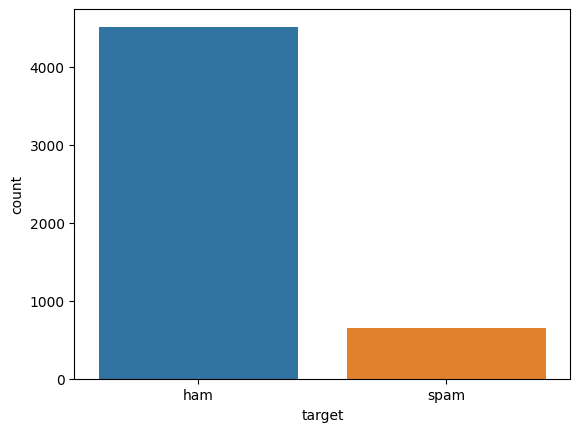

In [17]:
# Bargraph to display value count
sns.countplot(x=df.target)

In [18]:
#import stop words
import nltk
from nltk.corpus import stopwords

In [19]:
import re

In [20]:
#replace link type words like http etc
text=' '.join(df['mail'].values)

text=re.sub(r'http\S+','',text)

In [21]:
words=text.split()

In [27]:
#Remove words which are present in stop words and assign remeaning words in variable.
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
words=[word for word in words if not word in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
#clean words which is not cleaned by stopword and also not useful such as html tag etc.
from nltk.stem import PorterStemmer

def cleaning(text):
  text=re.sub(',.*?>','',text)
  text=re.sub('[^a-zA-Z]',' ',text).lower()
  words=nltk.word_tokenize(text)
  words=[z for z in words if z not in stopwords.words('english')]
  stemmer=PorterStemmer()
  words=[stemmer.stem(w)for w in words]
  text=' '.join(words)
  return text

In [29]:
from tqdm.auto import tqdm
nltk.download('punkt')
tqdm.pandas()
df['mail']=df['mail'].progress_apply(cleaning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  0%|          | 0/5169 [00:00<?, ?it/s]

<ipython-input-29-9825eac5d7ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mail']=df['mail'].progress_apply(cleaning)


# spliting of data.

In [30]:
#spliting independent and dependent of data in vatiable
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(df['mail']).toarray()
y=df['target']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#split train test data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# **Logistic Regression**

In [33]:
classification=LogisticRegression()

In [34]:
classification.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=classification.predict(x_test)

In [36]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [37]:
#accuracy score
accuracy_score(y_test,y_pred)

0.9796905222437138

# confusion metrics

Text(0.5, 1.0, 'confusion matrix')

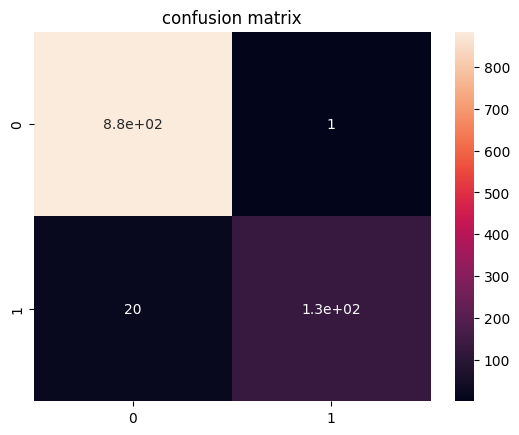

In [38]:
from sklearn.metrics import confusion_matrix
metrics=confusion_matrix(y_test,y_pred)
sns.heatmap(metrics,annot=True)
plt.title('confusion matrix')